kkk.shape (320, 6400)


/home/zhanghaoran/miniconda3/envs/CTR_GCN_ZHR/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


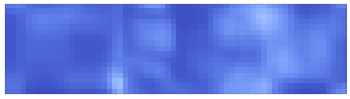

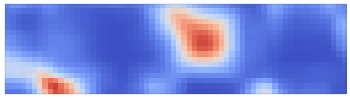

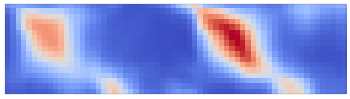

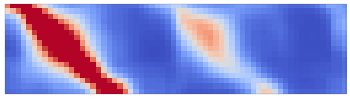

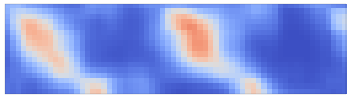

KeyboardInterrupt: 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import ctrgcn_zhr
import torch
import math

kkk = np.load('../../../../../../data/ssd1/zhanghaoran/zhr/pose_action_feature/stu8_56_numpy(用我的模型跑的,时间幅度为64).npy')
zzz = np.load('../../../../../../data/ssd1/zhanghaoran/zhr/pose_action_feature/stu7_34_numpy(用我的模型跑的,时间幅度为64).npy')
print('kkk.shape',kkk.shape)

kkk_benchmark = np.load('../../单个视频的64帧特征10/stu2_41_numpy(benchmark模型跑的,时间幅度为64).npy')
zzz_benchmark = np.load('../../单个视频的64帧特征10/stu7_34_numpy(benchmark模型跑的,时间幅度为64).npy')

similarity_numpy = np.array([])
t1 = 270
t2 = 310
t3 = 0
t4 = len(kkk)
for i in range(t1,t2,1):
    for j in range(t3,t4):
        norm_1 = np.linalg.norm(kkk[i])
        norm_2 = np.linalg.norm(kkk[j])
        similarity_score = np.dot(kkk[i], kkk[j]) / (norm_1*norm_2)
        similarity_numpy = np.append(similarity_numpy, similarity_score.item())
similarity_numpy_2 = similarity_numpy.reshape(t2-t1,t4-t3)


fig = plt.figure(figsize=(150, 10),dpi=12)

plt.imshow(similarity_numpy_2, cmap='coolwarm', interpolation='nearest',vmin=0,vmax=0.7)
plt.xticks([])
plt.yticks([])
# plt.savefig('../../YOLO/datasets/test/dudulu/heatmap_change_{}.png'.format(2), bbox_inches='tight', pad_inches=0)
plt.show()

similarity_numpy = np.array([])
t1 = 166
t2 = 176
t3 = 0
t4 = 380
for i in range(t1,t2,1):
    for j in range(t3,t4):
        norm_1 = np.linalg.norm(zzz[i])
        norm_2 = np.linalg.norm(zzz[j])
        similarity_score = np.dot(zzz[i], zzz[j]) / (norm_1*norm_2)
        similarity_numpy = np.append(similarity_numpy, similarity_score.item())
similarity_numpy_2 = similarity_numpy.reshape(t2-t1,t4-t3)


fig = plt.figure(figsize=(150, 10),dpi=12)

plt.imshow(similarity_numpy_2, cmap='coolwarm', interpolation='nearest',vmin=0,vmax=0.7)
plt.xticks([])
plt.yticks([])
# plt.savefig('../../YOLO/datasets/test/dudulu/heatmap_change_{}.png'.format(2), bbox_inches='tight', pad_inches=0)
plt.show()

In [ ]:
import csv

# 打开 CSV 文件进行读取
with open('pose_train.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)  # 创建 CSV 读取器对象

    # 跳过第一行（标题行）
    next(reader)

    list_for_pinggu = []
    ['front_raise', 'pull_up', 'squat', 'bench_pressing', 'push_up', 'jump_jack', 'situp', 'pommelhorse']

    count_time_less_than_20 = 0
    count_jump_jack = 0

    # 逐行读取并处理内容（不包括标题行）
    for row in reader:
        if row[1] == 'jump_jack':
            count_jump_jack += 1
        non_empty_count = len([value for value in row if value.strip() != ''])
        if non_empty_count >=7:
            if int(row[4]) - int(row[3])<=20 and int(row[6]) - int(row[5])<=20:
                count_time_less_than_20 += 1
                # print([row[1],row[2][:-4]])
                list_for_pinggu.append([row[1],row[2][:-4]])
    print(count_time_less_than_20)
    list_for_pinggu = np.array(list_for_pinggu)
    print(list_for_pinggu.shape)

    print('count_jump_jack',count_jump_jack)


  


In [ ]:
import csv

# 打开 CSV 文件进行读取
with open('pose_train.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)  # 创建 CSV 读取器对象

    # 跳过第一行（标题行）
    next(reader)

    list_for_jump_jack = []
    ['front_raise', 'pull_up', 'squat', 'bench_pressing', 'push_up', 'jump_jack', 'situp', 'pommelhorse']

    count_jump_jack = 0

    # 逐行读取并处理内容（不包括标题行）
    for row in reader:
        if row[1] == 'jump_jack':
            count_jump_jack += 1
            list_for_jump_jack.append([row[1],row[2][:-4]])
    list_for_jump_jack = np.array(list_for_jump_jack)

    print('count_jump_jack',count_jump_jack)
    print(list_for_jump_jack)

    


  


In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import sys
import ctrgcn_zhr
import torch
import math
import os

folder_path = '../../../../../../data/ssd1/zhanghaoran/zhr/pose_action_feature_遮挡十处/'

dudu = 0

with open('../../用于最终评估的各个矩阵和csv和图片/最终数据集.csv', newline='') as csvfile:
    with open('../../用于最终评估的各个矩阵和csv和图片/output_file.csv', 'w', newline='') as output_csv:
        reader = csv.reader(csvfile)  # 创建 CSV 读取器对象
        next(reader)

        for row in reader:
            # if dudu == 6:
            #     break
            # dudu += 1

            non_empty_count = len([value for value in row if value.strip() != ''])
            print(row)


            kkk = np.load(folder_path+'{}_numpy(用我的模型跑的,时间幅度为64).npy'.format(row[2][:-4]))
            
            for i in range(3,non_empty_count,2):

                if int(row[i+1]) >= len(kkk):
                    break
                similarity_numpy = np.array([])
                t1 = int(row[i])
                t2 = int(row[i+1])
                t3 = 0
                t4 = len(kkk)
                for index_1 in range(t1,t2,1):
                    for index_2 in range(t3,t4):
                        norm_1 = np.linalg.norm(kkk[index_1])
                        norm_2 = np.linalg.norm(kkk[index_2])
                        similarity_score = np.dot(kkk[index_1], kkk[index_2]) / (norm_1*norm_2)
                        similarity_numpy = np.append(similarity_numpy, similarity_score.item())
                similarity_numpy_2 = similarity_numpy.reshape(t2-t1,t4-t3)
                # 打开 CSV 文件进行写入
                
                # writer = csv.writer(output_csv)  # 创建 CSV 写入器对象

                # output_line = [row[2][:-4]+'({})'.format(str(i//2)),row[1],row[i],row[i+1],str(int(row[i+1]) - int(row[i]))]
                # writer.writerow(output_line)

                np.save('../../../../../../data/ssd1/zhanghaoran/zhr/相似性矩阵_pose_action_feature_遮挡十处/{}.npy'.format(row[2][:-4]+'({})'.format(str(i//2))),similarity_numpy_2)


# fig = plt.figure(figsize=(150, 10),dpi=12)

# plt.imshow(similarity_numpy_2, cmap='coolwarm', interpolation='nearest',vmin=0,vmax=0.7)
# plt.xticks([])
# plt.yticks([])
# # plt.savefig('../../YOLO/datasets/test/dudulu/heatmap_change_{}.png'.format(2), bbox_inches='tight', pad_inches=0)
# plt.show()

print("数据写入完成")


# with open('../../用于最终评估的各个矩阵和对应的csv/output_file.csv', newline='') as csvfile:
#     reader = csv.reader(csvfile)  # 创建 CSV 读取器对象

#     for row in reader:
#         print(row[0],row[1],row[2])

['6', 'jump_jack', 'stu6_18.mp4', '378', '411', '523', '540', '556', '598', '615', '688', '702', '759', '775', '863', '880', '903', '936', '949', '1017', '1033', '1050', '1089', '1128', '1153', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['8', 'squat', 'stu4_66.mp4', '66', '83', '100', '115', '130', '150', '167', '191', '218', '230', '249', '271', '290', '310', '325', '350', '370', '391', '413', '428', '451', '465', '483', '502', '525', '541', '555', '575', '593', '622', '636', '650', '666', '688', '711', '726', '1090', '1105', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['12', 'squat', 'stu9_63.mp4', '20', '46', '76', '101', '132', '158', '190', '220', '253', '286', '313', '350'

['457', 'pommelhorse', 'stu12_23.mp4', '280', '293', '308', '316', '329', '336', '350', '360', '608', '616', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '535', '546', '560', '570', '581', '592', '605', '615', '626', '636', '652', '663', '675', '685', '698', '706', '720', '730', '742', '756', '768', '780', '791', '800', '816', '823', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
280 293
308 316
329 336
350 360
608 616
['458', 'pommelhorse', 'stu12_24.mp4', '0', '14', '25', '36', '75', '85', '102', '112', '156', '168', '253', '266', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '

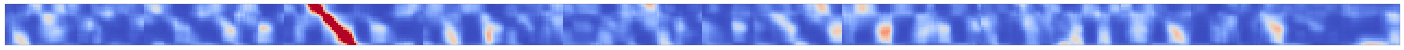

数据写入完成


In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import sys
import ctrgcn_zhr
import torch
import math
import os

folder_path = '../../../../../../data/ssd1/zhanghaoran/zhr/pose_action_feature/'

dudu = 0

with open('pose_train.csv', newline='') as csvfile:
    with open('../../用于最终评估的各个矩阵和对应的csv/output_file.csv', 'w', newline='') as output_csv:
        reader = csv.reader(csvfile)  # 创建 CSV 读取器对象
        next(reader)

        gugu = 1
        for row in reader:
            if gugu<=457:
                gugu += 1
                continue

            non_empty_count = len([value for value in row if value.strip() != ''])
            print(row)


            kkk = np.load(folder_path+'{}_numpy(用我的模型跑的,时间幅度为64).npy'.format(row[2][:-4]))
            
            for i in range(3,non_empty_count,2):
                print(row[i],row[i+1])
                if int(row[i+1]) >= len(kkk):
                    break
                similarity_numpy = np.array([])
                t1 = int(row[i])
                t2 = int(row[i+1])
                t3 = 0
                t4 = len(kkk)
                for index_1 in range(t1,t2,1):
                    for index_2 in range(t3,t4):
                        norm_1 = np.linalg.norm(kkk[index_1])
                        norm_2 = np.linalg.norm(kkk[index_2])
                        similarity_score = np.dot(kkk[index_1], kkk[index_2]) / (norm_1*norm_2)
                        similarity_numpy = np.append(similarity_numpy, similarity_score.item())
                similarity_numpy_2 = similarity_numpy.reshape(t2-t1,t4-t3)
                # 打开 CSV 文件进行写入
                
                writer = csv.writer(output_csv)  # 创建 CSV 写入器对象

                output_line = [row[2][:-4]+'({})'.format(str(i//2)),row[1],row[i],row[i+1],str(int(row[i+1]) - int(row[i]))]
                writer.writerow(output_line)

                np.save('../../用于最终评估的各个矩阵和对应的csv/所有的段落找出来的相似性矩阵_剩余部分/{}.npy'.format(row[2][:-4]+'({})'.format(str(i//2))),similarity_numpy_2)


fig = plt.figure(figsize=(150, 10),dpi=12)

plt.imshow(similarity_numpy_2, cmap='coolwarm', interpolation='nearest',vmin=0,vmax=0.7)
plt.xticks([])
plt.yticks([])
# plt.savefig('../../YOLO/datasets/test/dudulu/heatmap_change_{}.png'.format(2), bbox_inches='tight', pad_inches=0)
plt.show()

print("数据写入完成")


# with open('../../用于最终评估的各个矩阵和对应的csv/output_file.csv', newline='') as csvfile:
#     reader = csv.reader(csvfile)  # 创建 CSV 读取器对象

#     for row in reader:
#         print(row[0],row[1],row[2])

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import sys
import ctrgcn_zhr
import torch
import math
import os

for file in os.listdir('../../用于最终评估的各个矩阵和对应的csv/所有的段落找出来的相似性矩阵_全部'):
    numpy = np.load('../../用于最终评估的各个矩阵和对应的csv/所有的段落找出来的相似性矩阵_全部/{}'.format(file))
    # print(numpy.shape)
    fig = plt.figure(figsize=(150, 10),dpi=12)

    plt.imshow(numpy, cmap='coolwarm', interpolation='nearest',vmin=0,vmax=0.7)
    plt.xticks([])
    plt.yticks([])
    plt.savefig('../../YOLO/datasets/test/dudulu/heatmap_change_{}.png'.format(2), bbox_inches='tight', pad_inches=0)
    # plt.show()

    print("数据写入完成")


/home/zhanghaoran/miniconda3/envs/CTR_GCN_ZHR/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


数据写入完成
数据写入完成
数据写入完成
数据写入完成
数据写入完成
数据写入完成
数据写入完成
数据写入完成
数据写入完成
数据写入完成
数据写入完成
数据写入完成
数据写入完成
数据写入完成
数据写入完成
数据写入完成
数据写入完成
数据写入完成
数据写入完成
数据写入完成
数据写入完成


KeyboardInterrupt: 

生成评估新的训练label标签文件

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import sys
import ctrgcn_zhr
import torch
import math
import os

# count = 0 
# with open('../../用于最终评估的各个矩阵和csv和图片/output_file_全部.csv', newline='') as csvfile:
#     reader = csv.reader(csvfile)  # 创建 CSV 读取器对象
#     for row in reader:
#         count += 1
#         print(row)
# print(count)

file_path = '../../../../../../data/ssd1/zhanghaoran/zhr/相似性矩阵_pose_action_feature_遮挡十处/'
dong = 0
for file_name in os.listdir(file_path):
    dong += 1
    print(dong)
    print(file_name)
    kkk = np.load(file_path + file_name)
    # print(kkk.shape)


    for i in range(kkk.shape[1]//64):
        gululu = kkk[:,i*64:(i+1)*64]


        fig = plt.figure(figsize=(150, 10),dpi=12)
        plt.imshow(gululu, cmap='coolwarm', interpolation='nearest',vmin=0,vmax=0.7)
        plt.xticks([])
        plt.yticks([])
        plt.savefig('../../../../../../data/ssd1/zhanghaoran/zhr/image_pose_action_feature_遮挡十处/image_{0}_{1}.png'.format(file_name[:-4], i), bbox_inches='tight', pad_inches=0)
        # plt.show()



/home/zhanghaoran/miniconda3/envs/CTR_GCN_ZHR/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1
stu3_44(9).npy
2
stu9_63(10).npy


/home/zhanghaoran/miniconda3/envs/CTR_GCN_ZHR/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


3
stu6_18(10).npy
4
stu7_67(2).npy
5
stu4_66(3).npy
6
stu10_58(2).npy
7
stu10_50(22).npy
8
stu4_18(9).npy
9
stu1_22(1).npy
10
stu3_44(3).npy
11
stu2_49(12).npy
12
stu7_55(9).npy
13
stu9_63(3).npy
14
stu8_63(26).npy
15
stu9_58(4).npy
16
stu3_44(6).npy
17
stu7_67(22).npy
18
stu8_63(10).npy
19
stu4_18(7).npy
20
stu8_35(2).npy
21
stu8_41(10).npy
22
stu9_63(7).npy
23
stu10_46(5).npy
24
stu4_66(16).npy
25
stu6_29(2).npy
26
train3386(1).npy
27
stu1_32(3).npy
28
stu4_34(1).npy
29
stu3_61(3).npy
30
stu1_22(6).npy
31
stu4_66(12).npy
32
stu1_72(3).npy
33
stu10_31(7).npy
34
stu2_58(20).npy
35
stu9_63(21).npy
36
stu7_67(26).npy
37
stu7_34(36).npy
38
stu2_49(8).npy
39
stu7_34(17).npy
40
stu3_64(5).npy
41
stu7_67(29).npy
42
stu8_44(13).npy
43
stu4_61(8).npy
44
stu7_55(7).npy
45
stu1_22(8).npy
46
stu3_64(6).npy
47
stu10_50(9).npy
48
stu9_63(11).npy
49
stu7_67(25).npy
50
stu1_22(9).npy
51
stu4_15(2).npy
52
stu7_34(32).npy
53
val824(3).npy
54
stu7_64(3).npy
55
stu2_49(9).npy
56
train2712(4).npy
57
stu3_

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import sys
import ctrgcn_zhr
import torch
import math
import os

count = 0 
with open('../../用于最终评估的各个矩阵和对应的csv/output_file_全部.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)  # 创建 CSV 读取器对象
    for row in reader:
        if int(row[4])<=
        count += 1
        print(row[4])
print(count)

20
30
33
27
18
15
12
10
11
10
10
15
10
18
20
24
25
22
21
36
33
32
25
31
88
20
33
17
42
73
57
88
23
13
16
39
25
50
36
50
40
17
15
20
24
12
22
20
25
21
15
14
19
16
20
29
14
22
15
14
42
19
27
23
21
27
26
25
26
30
33
37
44
25
31
25
33
36
35
30
33
26
32
37
30
42
33
49
51
50
100
29
21
30
31
44
73
28
30
49
11
8
8
9
8
11
11
10
10
18
9
9
10
10
10
10
10
10
9
11
10
12
7
12
25
9
10
6
10
14
5
8
7
10
4
4
11
7
11
5
6
6
16
13
5
5
6
15
4
14
5
7
14
5
13
18
9
4
4
5
9
4
5
9
10
14
11
10
11
12
11
8
8
11
12
12
11
11
12
13
11
14
8
10
11
10
14
21
22
38
49
27
20
63
20
22
27
16
20
17
22
21
21
22
17
20
23
20
19
24
15
16
18
20
21
11
11
10
13
12
11
13
11
12
13
11
8
11
11
10
11
11
12
11
10
11
12
11
10
11
11
10
11
10
8
8
11
8
11
11
12
11
11
12
31
33
30
25
29
30
28
24
28
26
28
28
27
32
30
31
30
31
29
27
27
27
27
26
28
36
25
14
14
15
17
15
16
16
15
19
17
15
21
22
17
14
19
14
23
24
24
24
24
22
30
42
26
89
80
91
110
20
44
37
26
21
22
32
16
27
28
45
21
29
39
47
65
7
18
29
80
20
13
14
11
15
12
12
13
18
15
13
12
15
13
15
37